In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from imp import reload
import sys
sys.path.insert(0, '..')
import utilities as ut

from skimage import img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.measure import grid_points_in_poly

# Data Import

In [2]:
hst = img_as_float(ut.read_hyperstack('../data/wt_gbe_20180110.h5'))

In [5]:
mhst = ut.read_hyperstack('../data/wt_gbe_20180110_mask.h5')[:,300:800,:]

# Setup roi binning

In [6]:
xgrid = np.linspace(0,1024,20).astype(int)
xgrid

array([   0,   53,  107,  161,  215,  269,  323,  377,  431,  485,  538,
        592,  646,  700,  754,  808,  862,  916,  970, 1024])

In [7]:
ygrid = np.array([0,180,500])
ygrid

array([  0, 180, 500])

In [10]:
# Split image into a grid
rois = np.zeros_like(mhst[0])

n=1
for j in range(len(ygrid)-1):
    y = ygrid[j]
    ydt = ygrid[j+1]
    for i in range(len(xgrid)-1):
        x = xgrid[i]
        xdt = xgrid[i+1]
        
        if j > 0:
            xdt = xgrid[-i-1]
            x = xgrid[-i-2]
            
#         print(n,x,xdt,y,ydt)
#         print(n)
        rois[y:ydt,x:xdt] = n
        n = n+1

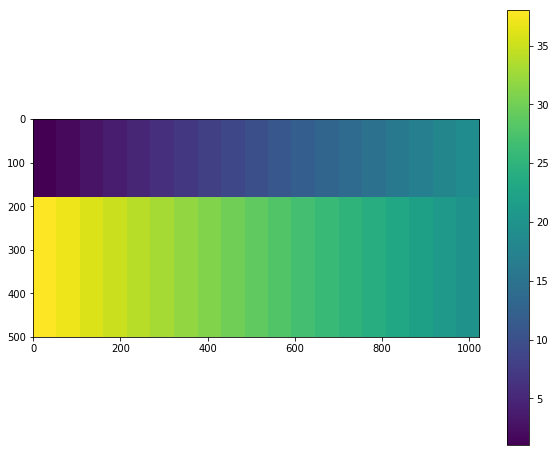

In [11]:
ut.imshow(rois)

In [12]:
nroi = np.unique(rois).shape
nroi

(38,)

In [19]:
Lavgs = []
for t in range(mhst.shape[0]):
    avgs = []
    for n in range(1,nroi[0]+1):
        avgs.append(np.nanmean(mhst[i][rois==n]))
    Lavgs.append(pd.DataFrame({'avg_intensity':avgs,'roi':range(1,nroi[0]+1)}))

In [20]:
avg_int = pd.concat(Lavgs,keys=range(mhst.shape[0]))

In [27]:
avg_int = avg_int.reset_index().rename(columns={'level_0':'frame'}).drop('level_1',axis=1)

In [28]:
avg_int.head()

,frame,avg_intensity,roi
0,0,0.055738,1
1,0,0.172289,2
2,0,0.229762,3
3,0,0.235387,4
4,0,0.194955,5


In [30]:
grouproi = avg_int.groupby('roi')

In [32]:
grouproi['d_intensity'] = grouproi['avg_intensity'].diff()

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [33]:
grouproi.diff()

,avg_intensity,frame
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


https://stackoverflow.com/questions/20670726/computing-diffs-in-pandas-after-using-groupby-leads-to-unexpected-result